In [2]:
from PIL import Image
import face_recognition
import os
import matplotlib.pyplot as plt
import hashlib
import cv2
import tensorflow as tf

In [22]:
def extract_faces(image_path, begin_index, output_dir="extracted_faces/"):
    # Tạo thư mục nếu chưa tồn tại
    os.makedirs(output_dir, exist_ok=True)

    # Load ảnh và tìm các khuôn mặt
    image = face_recognition.load_image_file(image_path)
    face_locations = face_recognition.face_locations(image)

    # Danh sách lưu các tệp khuôn mặt
    face_files = []
    index = begin_index
    for i, face_location in enumerate(face_locations):
        # Lấy vị trí khuôn mặt
        top, right, bottom, left = face_location
        face_image = image[top:bottom, left:right]

        # Chuyển khuôn mặt sang định dạng PIL Image
        pil_image = Image.fromarray(face_image)

        # Lưu khuôn mặt vào tệp
        face_path = os.path.join(output_dir, f"face_{index}.jpg")
        index += 1
        pil_image.save(face_path)
        face_files.append(face_path)

    print(f"Đã trích xuất {len(face_locations)} khuôn mặt vào thư mục '{output_dir}'.")
    return face_files, index

Đã trích xuất 1 khuôn mặt vào thư mục 'extracted_faces/'.
Đã trích xuất 14 khuôn mặt vào thư mục 'extracted_faces/'.
Đã trích xuất 12 khuôn mặt vào thư mục 'extracted_faces/'.
Đã trích xuất 4 khuôn mặt vào thư mục 'extracted_faces/'.


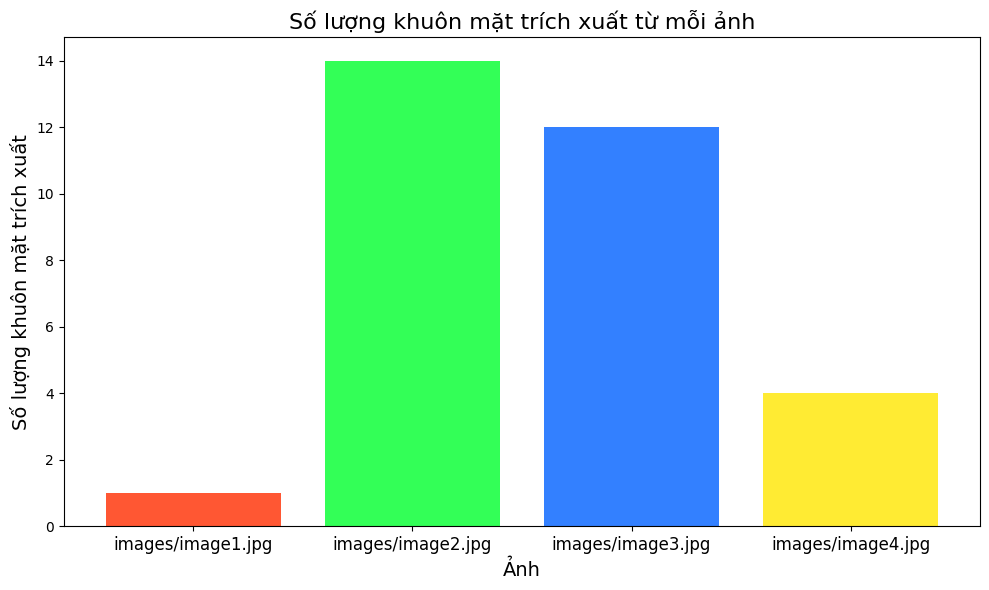

In [23]:
import os
import face_recognition
import matplotlib.pyplot as plt
from PIL import Image

# Danh sách các file ảnh
image_files = ["images/image1.jpg", "images/image2.jpg", "images/image3.jpg", "images/image4.jpg"]

# Lấy số lượng khuôn mặt từ mỗi ảnh
faces_per_image = []
begin_index = 1
for image_path in image_files:
    # Gọi hàm extract_faces để trích xuất khuôn mặt
    extracted_faces, new_begin_index = extract_faces(image_path, begin_index)
    faces_per_image.append(len(extracted_faces))  # Số lượng khuôn mặt trích xuất từ ảnh
    begin_index = new_begin_index  # Cập nhật index để tiếp tục trích xuất khuôn mặt cho ảnh tiếp theo

# Màu sắc dễ nhìn hơn cho mỗi ảnh
colors = ['#FF5733', '#33FF57', '#3380FF', '#FFEB33']  # Các màu sắc đẹp hơn

# Vẽ biểu đồ 
plt.figure(figsize=(10,6))  # Tạo kích thước figure lớn hơn cho dễ nhìn
plt.bar(image_files, faces_per_image, color=colors)

# Cải thiện tiêu đề và trục
plt.xlabel('Ảnh', fontsize=14)
plt.ylabel('Số lượng khuôn mặt trích xuất', fontsize=14)
plt.title('Số lượng khuôn mặt trích xuất từ mỗi ảnh', fontsize=16)

# Cải thiện độ dãn cách giữa các cột
plt.xticks(rotation=0, ha='center', fontsize=12)
# Hiển thị biểu đồ
plt.tight_layout()  # Tự động điều chỉnh để các phần không bị cắt bớt
plt.show()

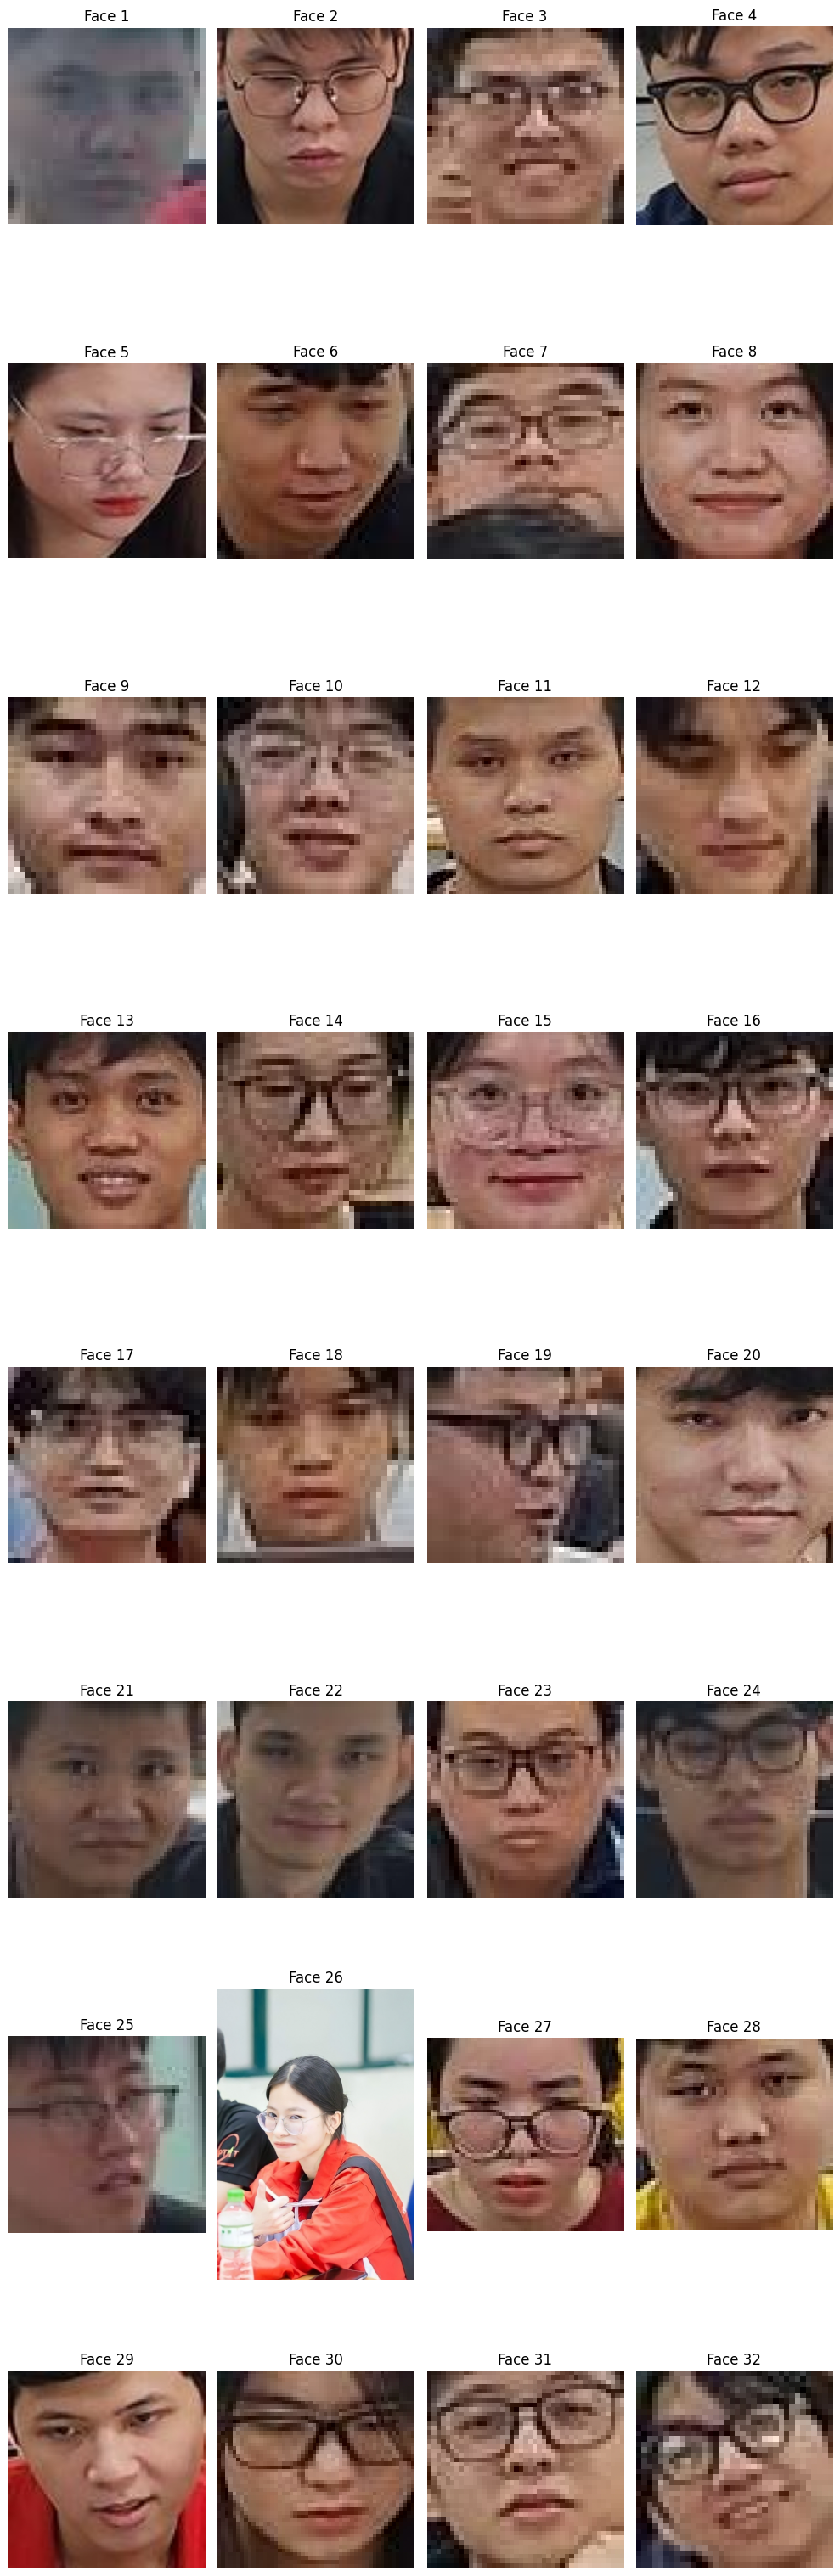

In [25]:
def show_extracted_faces_plot(directory="extracted_faces/"):
    # Kiểm tra xem thư mục có tồn tại không
    if not os.path.exists(directory):
        print(f"Thư mục '{directory}' không tồn tại. Đã tạo thư mục.")
        os.makedirs(directory)
        return

    # Lấy danh sách file ảnh trong thư mục
    face_files = [os.path.join(directory, file) for file in os.listdir(directory) if file.endswith(".jpg")]

    # Nếu không có ảnh nào trong thư mục
    if not face_files:
        print(f"Không tìm thấy ảnh nào trong thư mục '{directory}'.")
        return

    # Xác định số lượng ảnh và số cột mỗi hàng
    num_images = len(face_files)
    num_cols = 4  # Hiển thị 4 ảnh mỗi dòng
    num_rows = (num_images + num_cols - 1) // num_cols  # Tính số hàng

    # Hiển thị từng ảnh trong một figure
    plt.figure(figsize=(10, 4 * num_rows))
    for i, face_path in enumerate(face_files):
        image = Image.open(face_path)

        # Tạo subplot cho từng ảnh
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(image)
        plt.axis("off")  # Tắt hiển thị trục
        plt.title(f"Face {i + 1}")

    # Hiển thị tất cả ảnh
    plt.tight_layout()
    plt.show()

# Gọi hàm
show_extracted_faces_plot("extracted_faces/")  # Thay đổi nếu cần kiểm tra thư mục khác


In [11]:
def recognize_face_in_dataset(target_image_path, dataset_directory, threshold=0.5):
    # Lấy danh sách các ảnh trong dataset
    face_files = [os.path.join(dataset_directory, file) for file in os.listdir(dataset_directory) if file.endswith(".jpg")]

    # Nếu không có ảnh nào trong dataset
    if not face_files:
        print(f"Không tìm thấy ảnh nào trong thư mục '{dataset_directory}'.")
        return None

    # Mở ảnh mục tiêu và nhận diện khuôn mặt
    target_image = face_recognition.load_image_file(target_image_path)
    target_face_encoding = face_recognition.face_encodings(target_image)

    if not target_face_encoding:
        print(f"Không tìm thấy khuôn mặt trong ảnh mục tiêu: {target_image_path}")
        return None

    target_face_encoding = target_face_encoding[0]

    # So sánh ảnh mục tiêu với tất cả ảnh trong dataset
    for face_path in face_files:
        # Mở ảnh trong dataset và nhận diện khuôn mặt
        dataset_image = face_recognition.load_image_file(face_path)
        dataset_face_encodings = face_recognition.face_encodings(dataset_image)

        if not dataset_face_encodings:
            print(f"Không tìm thấy khuôn mặt trong ảnh: {face_path}")
            continue

        dataset_face_encoding = dataset_face_encodings[0]

        # So sánh khuôn mặt của ảnh trong dataset với ảnh mục tiêu
        distance = face_recognition.face_distance([dataset_face_encoding], target_face_encoding)[0]
        if distance <= threshold:
            print(f"Ảnh '{face_path}' khớp đúng với ảnh mục tiêu! (Distance: {distance:.4f})")
            show_comparison_images(target_image_path, face_path)
            return face_path  # Dừng lại sau khi tìm thấy ảnh khớp

    print("Không tìm thấy ảnh nào khớp với mục tiêu.")
    return None


In [12]:
def show_comparison_images(target_image_path, dataset_image_path):
    # Mở ảnh mục tiêu và ảnh trong dataset
    target_image = plt.imread(target_image_path)
    dataset_image = plt.imread(dataset_image_path)

    # Vẽ ảnh mục tiêu và ảnh trong dataset
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    ax[0].imshow(target_image)
    ax[0].axis('off')  # Tắt trục
    ax[0].set_title("Ảnh Mục Tiêu")

    ax[1].imshow(dataset_image)
    ax[1].axis('off')  # Tắt trục
    ax[1].set_title("Ảnh Dataset")

    plt.show()

Ảnh 'extracted_faces/face32.jpg' khớp đúng với ảnh mục tiêu! (Distance: 0.3595)


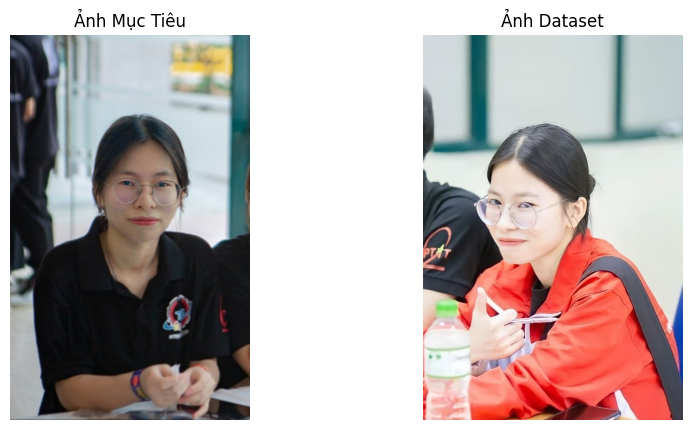

'extracted_faces/face32.jpg'

In [13]:
# Đường dẫn ảnh mục tiêu
target_image_path = "target_images/image.jpg"  

# Đường dẫn dataset chứa các ảnh
dataset_directory = "extracted_faces/"  

# Gọi hàm nhận diện
recognize_face_in_dataset(target_image_path, dataset_directory)

Đã trích xuất 1 khuôn mặt vào thư mục 'extracted_faces/'.
Đã trích xuất 14 khuôn mặt vào thư mục 'extracted_faces/'.
Đã trích xuất 12 khuôn mặt vào thư mục 'extracted_faces/'.
Đã trích xuất 4 khuôn mặt vào thư mục 'extracted_faces/'.


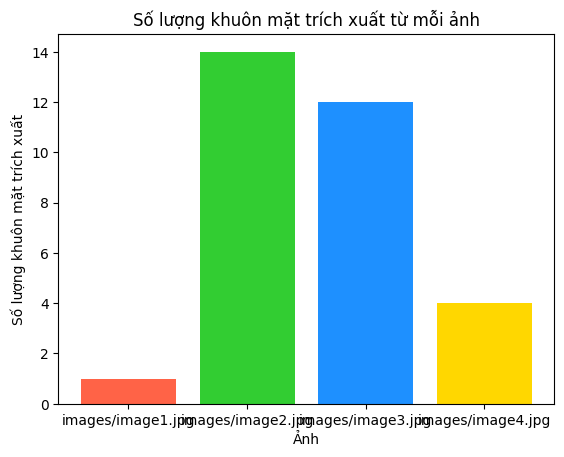

In [18]:
import os
import face_recognition
import matplotlib.pyplot as plt
from PIL import Image

# Danh sách các file ảnh
image_files = ["images/image1.jpg", "images/image2.jpg", "images/image3.jpg", "images/image4.jpg"]

# Lấy số lượng khuôn mặt từ mỗi ảnh
faces_per_image = []
begin_index = 1
for image_path in image_files:
    # Gọi hàm extract_faces để trích xuất khuôn mặt
    extracted_faces, new_begin_index = extract_faces(image_path, begin_index)
    faces_per_image.append(len(extracted_faces))  # Số lượng khuôn mặt trích xuất từ ảnh
    begin_index = new_begin_index  # Cập nhật index để tiếp tục trích xuất khuôn mặt cho ảnh tiếp theo

# Màu sắc khác nhau cho mỗi ảnh
colors = ['#FF6347', '#32CD32', '#1E90FF', '#FFD700']

# Vẽ biểu đồ với màu sắc khác nhau cho mỗi ảnh
plt.bar(image_files, faces_per_image, color=colors)
plt.xlabel('Ảnh')
plt.ylabel('Số lượng khuôn mặt trích xuất')
plt.title('Số lượng khuôn mặt trích xuất từ mỗi ảnh')
plt.show()

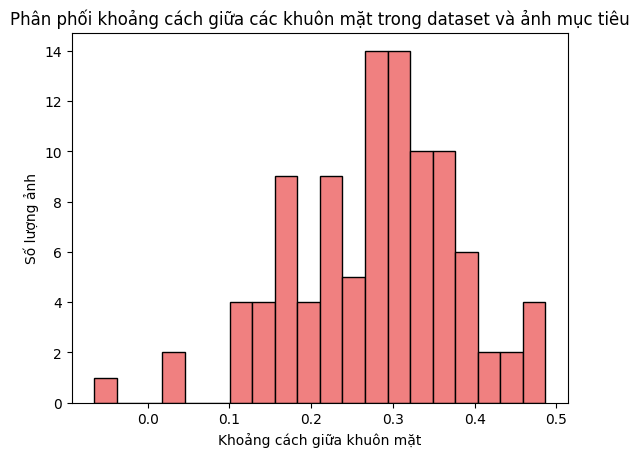

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Giả sử dữ liệu khoảng cách giữa các khuôn mặt trong dataset và ảnh mục tiêu
distances = np.random.normal(0.3, 0.1, 100)  # Khoảng cách giả định, phân phối chuẩn với trung bình 0.3 và độ lệch chuẩn 0.1

# Biểu đồ phân phối khoảng cách
plt.hist(distances, bins=20, color='lightcoral', edgecolor='black')
plt.xlabel('Khoảng cách giữa khuôn mặt')
plt.ylabel('Số lượng ảnh')
plt.title('Phân phối khoảng cách giữa các khuôn mặt trong dataset và ảnh mục tiêu')
plt.show()
